In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import calendar
import gmaps
#from config import g_key

## Setup certain functions to call back earlier, just to be at the top so there were no conflicts of not yet called
degrees = 45
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']

In [2]:
# Initial MTA Data pull

mta_path = "Repository/body.csv"

mta_df = pd.read_csv(mta_path)

mta_df

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0
...,...,...,...,...,...,...,...,...,...,...,...,...
131649,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-19,9500.0,8319.0
131650,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-20,23744.0,18923.0
131651,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-21,24057.0,19281.0
131652,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,2020-10-22,9761.0,8563.0


In [3]:
# Initial Covid data pull

covid_path = "Repository/data-HdO5F.csv"

covid_df = pd.read_csv(covid_path)

covid_df = covid_df[['DATE_OF_INTEREST', 'Cases']]

covid_df = covid_df.rename(columns={'DATE_OF_INTEREST': 'date'})

covid_df.head()

,date,Cases
0,2/29/2020,1
1,3/3/2020,1
2,3/4/2020,5
3,3/5/2020,3
4,3/6/2020,8


In [4]:
# Convert covid data to similar datetime, as well as merging two main data sources to have both numbers on one dataframe

covid_df['date'] = pd.to_datetime(covid_df.date)
covid_df['date'] = covid_df['date'].astype(str)

mta_covid=pd.merge(mta_df, covid_df, on='date', how="left")

mta_covid.fillna(value=0, inplace=True)

mta_covid

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,date,entries,exits,Cases
0,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-01,5812.0,6659.0,0.0
1,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-02,15506.0,14307.0,0.0
2,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-03,15959.0,14500.0,0.0
3,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-04,9265.0,9161.0,0.0
4,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,2020-01-05,7191.0,7743.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131649,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-19,9500.0,8319.0,546.0
131650,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-20,23744.0,18923.0,494.0
131651,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-21,24057.0,19281.0,536.0
131652,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,2020-10-22,9761.0,8563.0,526.0


In [5]:
mta_df.columns

Index(['stop_name', 'daytime_routes', 'division', 'line', 'borough',
       'structure', 'gtfs_longitude', 'gtfs_latitude', 'complex_id', 'date',
       'entries', 'exits'],
      dtype='object')

In [6]:
# Pulling out date data to individualize each column with its month and day of the month

mta_df_monthly = mta_df.set_index(['date'])

mta_df_monthly.index = pd.to_datetime(mta_df_monthly.index)

mta_df_monthly['day'] = mta_df_monthly.index.day
mta_df_monthly['month'] = mta_df_monthly.index.month
mta_df_monthly['year'] = mta_df_monthly.index.year

mta_df_monthly["month"] = pd.to_datetime(mta_df_monthly["month"], format='%m').dt.month_name()

mta_df_monthly

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,day,month,year
date,,,,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0,1,January,2020
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0,2,January,2020
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0,3,January,2020
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0,4,January,2020
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0,5,January,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,9500.0,8319.0,19,October,2020
2020-10-20,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,23744.0,18923.0,20,October,2020
2020-10-21,Journal Sq,NaN,PTH,NaN,NaN,NaN,-74.068632,40.730304,R552,24057.0,19281.0,21,October,2020


In [7]:
mta_df_grouped = mta_df.groupby(mta_df['date'])['entries'].sum()

mta_df_grouped

date
2020-01-01    2419171.0
2020-01-02    5277939.0
2020-01-03    5224641.0
2020-01-04    2921789.0
2020-01-05    2369956.0
                ...    
2020-10-19    1704718.0
2020-10-20    1777332.0
2020-10-21    1805682.0
2020-10-22    1797361.0
2020-10-23    1658918.0
Name: entries, Length: 297, dtype: float64

In [8]:
# Creating series for daily chart with daily s

mta_covid_cases = mta_covid.groupby(mta_covid['date'])['Cases'].max()

mta_covid_entries = mta_covid.groupby(mta_covid['date'])['entries'].sum()

mta_covid_df = mta_covid_cases.to_frame().join(mta_covid_entries)

mta_covid_df.reset_index()

mta_covid_df

,Cases,entries
date,,
2020-01-01,0.0,2419171.0
2020-01-02,0.0,5277939.0
2020-01-03,0.0,5224641.0
2020-01-04,0.0,2921789.0
2020-01-05,0.0,2369956.0
...,...,...
2020-10-19,546.0,1704718.0
2020-10-20,494.0,1777332.0
2020-10-21,536.0,1805682.0


<function matplotlib.pyplot.show(close=None, block=None)>

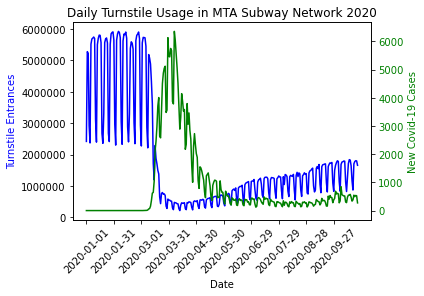

In [9]:
#### First Figure to demonstrate raw daily usage/day data compared to daily new covid cases

# Raw Data variables
mta_y = mta_covid_df['Cases']
mta_x = mta_covid_df.index
mta_y2 = mta_covid_df['entries']

# First subplot(ax10) to show MTA/Day data
fig10, ax10 = plt.subplots()
ax10_1_color = 'blue'
ax10.set_xlabel('Date')
ax10.set_ylabel('Turnstile Entrances', color = ax10_1_color)
ax10.plot(mta_x, mta_y2, color=ax10_1_color)

ax10 = plt.gca()
ticks_to_use = mta_covid_df.index[::30]
ax10.set_xticks(ticks_to_use)
ax10.ticklabel_format(axis='y', useOffset=False, style='plain')
ax10.tick_params(axis='x', labelrotation=45)

# Second subplot(ax11) showing COvid/Day data
ax11 = ax10.twinx()

ax11_1_color = 'green'
ax11.set_ylabel('New Covid-19 Cases', color = ax11_1_color)
ax11.plot(mta_x, mta_y, color = ax11_1_color)
ax11.tick_params(axis='y', labelcolor=ax11_1_color)

ax11 = plt.gca()
ticks_to_use = mta_covid_df.index[::30]
ax11.set_xticks(ticks_to_use)
ax11.tick_params(axis='x', labelrotation=45)

fig10.tight_layout()

plt.title("Daily Turnstile Usage in MTA Subway Network 2020")

plt.savefig("Graph-Data/Daily_MTA_Turnstile.png")

plt.show

In [10]:
## Creating data frame to use for monthly data pull
# Extracts the month for every entry to use in grouped aggregation

mta_df_monthly = mta_covid.set_index(['date']).copy()

mta_df_monthly.index = pd.to_datetime(mta_df_monthly.index)

mta_df_monthly['day'] = mta_df_monthly.index.day
mta_df_monthly['month'] = mta_df_monthly.index.month
mta_df_monthly['year'] = mta_df_monthly.index.year

mta_df_monthly

,stop_name,daytime_routes,division,line,borough,structure,gtfs_longitude,gtfs_latitude,complex_id,entries,exits,Cases,day,month,year
date,,,,,,,,,,,,,,,
2020-01-01,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,5812.0,6659.0,0.0,1,1,2020
2020-01-02,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15506.0,14307.0,0.0,2,1,2020
2020-01-03,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,15959.0,14500.0,0.0,3,1,2020
2020-01-04,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,9265.0,9161.0,0.0,4,1,2020
2020-01-05,Astoria - Ditmars Blvd,N W,BMT,Astoria,Q,Elevated,-73.912034,40.775036,1,7191.0,7743.0,0.0,5,1,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-19,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,9500.0,8319.0,546.0,19,10,2020
2020-10-20,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,23744.0,18923.0,494.0,20,10,2020
2020-10-21,Journal Sq,0,PTH,0,0,0,-74.068632,40.730304,R552,24057.0,19281.0,536.0,21,10,2020


In [11]:
### Monthly Mean for cases and entries

mta_df_grouped_month = mta_df_monthly.groupby(mta_df_monthly.index).agg({'entries': ['sum'], 'Cases': ['max']})

mta_df_grouped_month.index = pd.to_datetime(mta_df_grouped_month.index)

mta_df_grouped_month['day'] = mta_df_grouped_month.index.day
mta_df_grouped_month['month'] = mta_df_grouped_month.index.month
mta_df_grouped_month['year'] = mta_df_grouped_month.index.year

mta_df_grouped_month["month"] = pd.to_datetime(mta_df_grouped_month["month"], format='%m').dt.month_name()

#mta_df_grouped_month.columns
mta_df_grouped_month.columns = mta_df_grouped_month.columns.droplevel(1)

#mta_df_grouped_month

mta_df_grouped_month_2 = mta_df_grouped_month.groupby(mta_df_grouped_month['month']).agg({'entries': ['sum'], 'Cases': ['max']})

mta_df_grouped_month_2.columns = mta_df_grouped_month_2.columns.droplevel(1)
month_list = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October']
mta_df_grouped_month_2 = mta_df_grouped_month_2.reindex(month_list)

mta_df_grouped_month_2

,entries,Cases
month,,
January,145227567.0,0.0
February,136154106.0,1.0
March,76892694.0,6130.0
April,12620955.0,6354.0
May,16301831.0,1889.0
June,24962440.0,687.0
July,33316578.0,484.0
August,35549881.0,348.0
September,42672179.0,685.0


<function matplotlib.pyplot.show(close=None, block=None)>

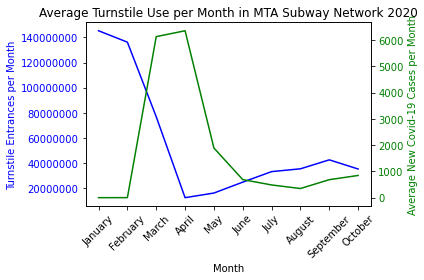

In [12]:
#### COVID/MONTH OUTLOOK FOR CLEANER CHART TO USE AS WELL

# cm_() means Covid/Month_(variable)
cm_x = mta_df_grouped_month_2.index
cm_y = mta_df_grouped_month_2['entries']
cm_y2 = mta_df_grouped_month_2['Cases']

# Subplot 1 (ax12) for MTA/Month data
fig, ax12 = plt.subplots()
ax12_color = 'blue'
ax12.set_xlabel('Month')
ax12.set_ylabel('Turnstile Entrances per Month', color=ax12_color)
ax12.plot(cm_x, cm_y, color=ax12_color)
ax12.ticklabel_format(axis='y', useOffset=False, style='plain')
ax12.tick_params(axis='y', labelcolor=ax12_color)

# Subplot 2 (ax13) for Covid/Month
ax13 = ax12.twinx()

ax13_color = 'green'
ax13.set_ylabel('Average New Covid-19 Cases per Month', color=ax13_color)
ax13.plot(cm_x, cm_y2, color=ax13_color)
ax13.tick_params(axis='y', labelcolor=ax13_color)

plt.title("Average Turnstile Use per Month in MTA Subway Network 2020")
ax12.tick_params(axis='x', labelrotation=45)
ax13.tick_params(axis='x', labelrotation=45)

fig.tight_layout()

plt.savefig("Graph-Data/Monthly_MTA_Turnstile.png")
plt.show

In [13]:
## Station Locations for heatmap?

# mta_df_locations = mta_df_monthly.dropna()

# mta_df_locations_grouped = mta_df_locations.groupby(['stop_name', 'month']).agg({'entries': ['mean'], 'gtfs_latitude': ['max'], 'gtfs_longitude': ['max']})

# mta_df_locations_grouped_jan = mta_df_locations_grouped.loc
